# Run SurvTRACE on SUPPORT dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os, sys
sys.path.append(os.path.abspath('../SurvTRACE'))

In [3]:
import pdb
from collections import defaultdict
import matplotlib.pyplot as plt

from survtrace.dataset import load_data
from survtrace.evaluate_utils import Evaluator
from survtrace.utils import set_random_seed
from survtrace.model import SurvTraceSingle
from survtrace.train_utils import Trainer
from survtrace.config import STConfig

# define the setup parameters
STConfig['data'] = 'support'

seed = STConfig['seed'] # 1234
#seed = 42

set_random_seed(seed)

hparams = {
    'batch_size': 128,
    'weight_decay': 0,
    'learning_rate': 1e-3,
    'epochs': 20,
}

In [4]:
# load data
df, df_train, df_y_train, df_test, df_y_test, df_val, df_y_val = load_data(STConfig)

# get model
model = SurvTraceSingle(STConfig)

# initialize a trainer
trainer = Trainer(model)
train_loss, val_loss = trainer.fit((df_train, df_y_train), (df_val, df_y_val),
        batch_size=hparams['batch_size'],
        epochs=hparams['epochs'],
        learning_rate=hparams['learning_rate'],
        weight_decay=hparams['weight_decay'],)

use pytorch-cuda for training.
[Train-0]: 69.07831454277039
[Val-0]: 1.3623063564300537
[Train-1]: 58.467445611953735
[Val-1]: 1.3373315334320068
[Train-2]: 57.860708236694336
[Val-2]: 1.3320564031600952
[Train-3]: 57.660372257232666
[Val-3]: 1.3224091529846191
[Train-4]: 57.66057777404785
[Val-4]: 1.3394445180892944
EarlyStopping counter: 1 out of 5
[Train-5]: 57.73791694641113
[Val-5]: 1.344979166984558
EarlyStopping counter: 2 out of 5
[Train-6]: 57.72607386112213
[Val-6]: 1.3340665102005005
EarlyStopping counter: 3 out of 5
[Train-7]: 57.69715058803558
[Val-7]: 1.330979824066162
EarlyStopping counter: 4 out of 5
[Train-8]: 57.57134974002838
[Val-8]: 1.3334736824035645
EarlyStopping counter: 5 out of 5
early stops at epoch 9


In [5]:
# evaluate model
evaluator = Evaluator(df, df_train.index)
evaluator.eval(model, (df_test, df_y_test))
print("done")

******************************
start evaluation
******************************
C-td:  0.38588300622182964
For 0.25 quantile,
TD Concordance Index - IPCW: 0.6642618065849337
Brier Score: 0.13564029781502593
Dynamic AUC:  0.6639264535157353
For 0.5 quantile,
TD Concordance Index - IPCW: 0.627385485132981
Brier Score: 0.2107868789244586
Dynamic AUC:  0.6456846806161874
For 0.75 quantile,
TD Concordance Index - IPCW: 0.6133733546704432
Brier Score: 0.2283472747618583
Dynamic AUC:  0.6692904623755038
done


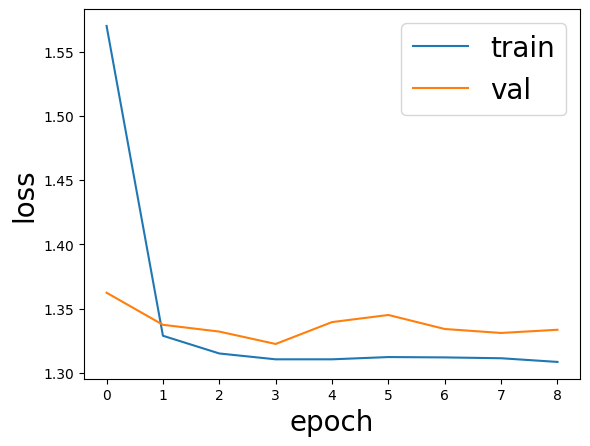

In [6]:
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.legend(fontsize=20)
plt.xlabel('epoch',fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.show()